# E-commerce Furniture Sales Prediction Project
This project aims to predict the number of furniture items sold on an e-commerce platform using product features.

In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score

# Load dataset
df = pd.read_csv('/content/ecommerce_furniture_dataset.csv')
df.head()


,productTitle,originalPrice,price,sold,tagText
0,Dresser For Bedroom With 9 Fabric Drawers Ward...,NaN,$46.79,600,Free shipping
1,Outdoor Conversation Set 4 Pieces Patio Furnit...,NaN,$169.72,0,Free shipping
2,Desser For Bedroom With 7 Fabric Drawers Organ...,$78.4,$39.46,7,Free shipping
3,"Modern Accent Boucle Chair,Upholstered Tufted ...",NaN,$111.99,0,Free shipping
4,Small Unit Simple Computer Desk Household Wood...,$48.82,$21.37,1,Free shipping


## Step 2: Data Preprocessing

In [9]:
df.drop(['originalPrice'], axis=1, inplace=True)
df.dropna(inplace=True)

df['price'] = df['price'].replace('[\$,]', '', regex=True).astype(float)
df['tagText'] = df['tagText'].apply(lambda x: x if x in ['Free shipping', '+Shipping: $5.09'] else 'others')

le = LabelEncoder()
df['tagText'] = le.fit_transform(df['tagText'])

df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 1997 entries, 0 to 1999
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   productTitle  1997 non-null   object 
 1   price         1997 non-null   float64
 2   sold          1997 non-null   int64  
 3   tagText       1997 non-null   int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 78.0+ KB


## Step 3: Exploratory Data Analysis

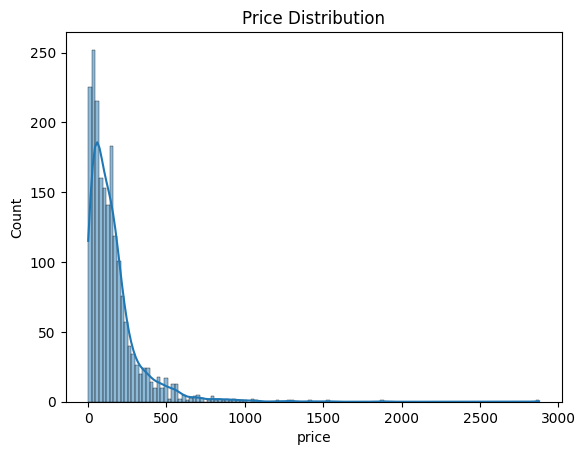

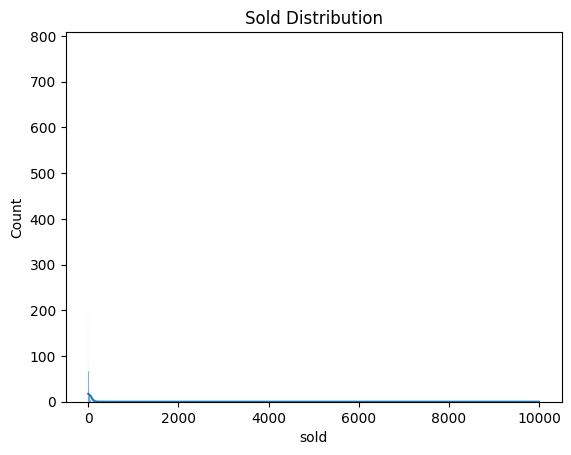

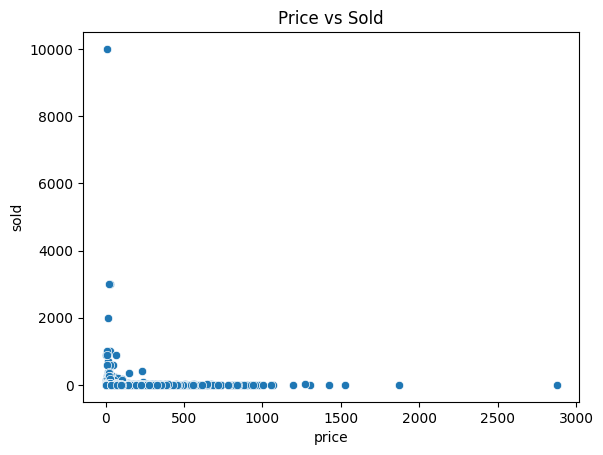

In [10]:
sns.histplot(df['price'], kde=True)
plt.title('Price Distribution')
plt.show()

sns.histplot(df['sold'], kde=True)
plt.title('Sold Distribution')
plt.show()

sns.scatterplot(x='price', y='sold', data=df)
plt.title('Price vs Sold')
plt.show()


## Step 4: Feature Engineering

In [11]:
tfidf = TfidfVectorizer(max_features=100)
title_tfidf = tfidf.fit_transform(df['productTitle'])

title_df = pd.DataFrame(title_tfidf.toarray(), columns=tfidf.get_feature_names_out(), index=df.index)
df = pd.concat([df, title_df], axis=1)
df.drop('productTitle', axis=1, inplace=True)

# Drop rows with NaN values after concatenation
df.dropna(inplace=True)

## Step 5: Model Training

In [12]:
X = df.drop('sold', axis=1)
y = df['sold']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

lr_model = LinearRegression()
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

lr_model.fit(X_train, y_train)
rf_model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

## Step 6: Model Evaluation

In [13]:
y_pred_lr = lr_model.predict(X_test)
y_pred_rf = rf_model.predict(X_test)

mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f'Linear Regression MSE: {mse_lr:.2f}, R2 Score: {r2_lr:.2f}')
print(f'Random Forest MSE: {mse_rf:.2f}, R2 Score: {r2_rf:.2f}')


Linear Regression MSE: 25923.96, R2 Score: 0.02
Random Forest MSE: 7498.35, R2 Score: 0.72
